# <span style="font-size: 210%;color:white;background:black">Fabryka modeli 1.3 [Titanic.txt]

### <span style="color:blue"> Cognition comes by comparison! Friedrich Wilhelm Nietzsche

In [1]:
def email(file, name):

    from email.mime.text import MIMEText
    from email.mime.multipart import MIMEMultipart
    import smtplib
    import mimetypes
    import email.mime.application

    smtp_ssl_host = 'smtp.gmail.com'  # smtp.mail.yahoo.com
    smtp_ssl_port = 465
    s = smtplib.SMTP_SSL(smtp_ssl_host, smtp_ssl_port)
    s.login('wtm695450085@gmail.com', 'Ewa183311')


    msg = MIMEMultipart()
    msg['Subject'] = file
    msg['From'] = 'wtm695450085@gmail.com'
    msg['To'] = 'wtm695450085@gmail.com'

    txt = MIMEText(name)
    msg.attach(txt)

    filename = file #path to file
    fo=open(filename,'rb')
    attach = email.mime.application.MIMEApplication(fo.read(),_subtype="pdf")
    fo.close()
    attach.add_header('Content-Disposition','attachment',filename=filename)
    msg.attach(attach)
    s.send_message(msg)
    s.quit()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.ensemble import BaggingClassifier
from simple_colors import * 
from prettytable import PrettyTable

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/2/Titanic.txt')
print(df.shape)
print()
print(df.columns)
df.head(3)

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## <div class="alert-warning"> Uruchomić gdy model LGBM będzie się burzył!

In [3]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## <div class="alert-success">Sample reduction:</div>

In [4]:
df = df.sample(frac = 1.00, random_state=148) 
df.shape

(891, 12)

#### Start pomiaru czasu

In [5]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Tue Jun 23 21:01:59 2020


### Tool for automatic coding of discrete variables !

In [6]:
a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Name --- object
Sex --- object
Ticket --- object
Cabin --- object
Embarked --- object


In [7]:
df.fillna(7777, inplace=True)

## <div class="alert-success"> Ustawienie wartości wynikowej

In [8]:
target = 'Survived'

In [9]:
X = df.drop(target, axis=1) 
y = df[target]  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

# <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">Oversampling !! 

In [10]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
    
    global Xtrain_OV
    global ytrain_OV

    calss1 = np.round((sum(ytrain == 1)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    calss0 = np.round((sum(ytrain == 0)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    
    print("y = 0: ", sum(ytrain == 0),'-------',calss0,'%')
    print("y = 1: ", sum(ytrain == 1),'-------',calss1,'%')
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1)
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
       
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    Xtrain_OV = pd.DataFrame(Xtrain_OV)
    ytrain_OV = pd.DataFrame(ytrain_OV)
    

    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
    
    
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    
       
    kot = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0)
    kot = pd.concat([ytrain, kot], axis = 0).reset_index(drop = True)
    ax = plt.subplot(1, 2, 2)
    kot.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show

y = 0:  439 ------- 62.0 %
y = 1:  273 ------- 38.0 %
--------------------------------------------------------

Before oversampling Xtrain:      (712, 11)
Before oversampling ytrain:      (712,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (1258, 11)
After oversampling ytrain_OV:   (1258, 1)
--------------------------------------------------------


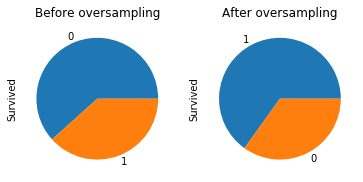

In [11]:
oversampling(y_train, X_train)

I used six models of GaussianNB, LogisticRegression, CatBoostClassifier in their basic version without oversamplin and with oversampling. We will see what differences in the minority set classification the oversampling method gives.!!

I get rid of one dimension from the ytrain_OV set so that the set is similar to y_test.

In [12]:
print(Xtrain_OV.shape)
print(ytrain_OV.shape)
ytrain_OV = ytrain_OV[target]
print(ytrain_OV.shape)

(1258, 11)
(1258, 1)
(1258,)


W poprzednim wpisie uznaliśmy, że oversampling poprawiło jakość klasyfikacji. Kolejne działania będą opierały sie na danych zbilansowanych przez oversampling. Dlatego teraz podmieniamy zwykłą próbę na próbę po oversamoling.

In [13]:
X_train = Xtrain_OV
y_train = ytrain_OV
print(X_train.shape)
print(y_train.shape)

(1258, 11)
(1258,)


## <span style="color:blue">Oversampling dla cross-validation

<span style="color:blue">Teraz robimy oversampling dla wartości testowych. Robimy tak ponieważ bedziemy robić oversampling, gdzie podział na zbiór testowy i treningowy jest robiony wielokrotnie (fałdy). Więc do równania oversampling wstawiamy połaczomy zbiór testowy i wynikowy. A warto żeby oba te zbiory były zbilansowane przez oversampling.  

In [14]:
X = df.drop(target, axis=1) 
y = df[target]  

In [15]:
X.shape

(891, 11)

y = 0:  549 ------- 62.0 %
y = 1:  342 ------- 38.0 %
--------------------------------------------------------

Before oversampling Xtrain:      (891, 11)
Before oversampling ytrain:      (891,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (1575, 11)
After oversampling ytrain_OV:   (1575, 1)
--------------------------------------------------------


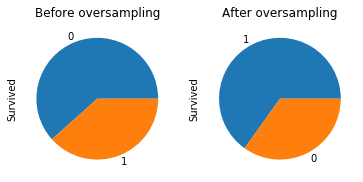

In [16]:
oversampling(y, X)

In [17]:
Data = Xtrain_OV
target = ytrain_OV
print("output:",Data.shape)
print("output:",target.shape)
print('----------')
print("input:", df.shape)

output: (1575, 11)
output: (1575, 1)
----------
input: (891, 12)


# Ścieżka do modeli:
### oznakowanie modeli

model1 - modele na ustawieniach fabrycznych

        classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
        nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

model2 - modele na ustawieniach fabrycznych po bagging

        classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
        nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
        
model3 - modele na ustawieniach fabrycznych po kalibracji     

model4 -  modele na ustawieniach fabrycznych po bagging po kalibracji

model5 - modele po cross-validation

        classifiers_F = [gs_SVM,gs_SVM2,gs_XGB,gs_LGBM,gs_KNN,gs_NBC,gs_LRE,gs_RFC,gs_RFC2]
        nameF = ['gs_SVM','gs_SVM2','gs_XGB','gs_LGBM','gs_KNN','gs_NBC','gs_LRE','gs_RFC','gs_RFC2']
        
model6 - modele po cross-validation po bagging 

model7 - modele na ustawieniach optymalnych

In [18]:
address1 ='/home/wojciech/Pulpit/7/model1-{0}.pkl'  #<=  modele na ustawieniach fabrycznych
address2 ='/home/wojciech/Pulpit/7/model2-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging
address3 ='/home/wojciech/Pulpit/7/model3-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po kalibracji
address4 ='/home/wojciech/Pulpit/7/model4-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging po kalibracji
address5 ='/home/wojciech/Pulpit/7/model5-{0}.pkl'  #<=  modele na cross-validation
address6 ='/home/wojciech/Pulpit/7/model6-{0}.pkl'  #<=  modele na ustawieniach optymalnych po bagging
address7 ='/home/wojciech/Pulpit/7/model7-{0}.pkl'  ##<=  modele na ustawieniach optymalnych 
address8 ='/home/wojciech/Pulpit/7/model8-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po boosting n=3
address9 ='/home/wojciech/Pulpit/7/model9-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po boosting n=10
address10 ='/home/wojciech/Pulpit/7/model10-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='isotonic')
address11 ='/home/wojciech/Pulpit/7/model11-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

### <span style="font-size: 110%;color:white;background:Red">Model 1 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych
### <span style="font-size: 110%;color:white;background:Red">Model 2  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging 


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import joblib
import time

NBC = GaussianNB()
LRE = LogisticRegression(solver='lbfgs')
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LGBM = LGBMClassifier() 
CBC = CatBoostClassifier(verbose=0, n_estimators=100)
XGB = XGBClassifier()
LREN = LogisticRegression(solver='newton-cg')
KNN = KNeighborsClassifier(n_neighbors=1, p=2)
SVM = SVC(probability=True) 

print()
print('----Models without settings-----------------------------')
print()

classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

for n,t in zip(nameA,classifiers_A):          ## Szkolenie modeli w pętli
    start_time = time.time()
    t.fit(X_train, y_train)
    filename1 =address1.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename1, compress=9)
    #email(filename1,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())


### Wzmacnianie przez bagowanie!

NBC_b = BaggingClassifier(base_estimator=NBC, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_b = BaggingClassifier(base_estimator=LRE, n_estimators=10, max_samples=0.8, max_features=0.8)
GBC_b = BaggingClassifier(base_estimator=GBC, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_b = BaggingClassifier(base_estimator=RFC, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_b = BaggingClassifier(base_estimator=LGBM, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_b = BaggingClassifier(base_estimator=CBC, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_b = BaggingClassifier(base_estimator=XGB, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM_b = BaggingClassifier(base_estimator=SVM, n_estimators=10, max_samples=0.8, max_features=0.8)
KNN_b = BaggingClassifier(base_estimator=KNN, n_estimators=10, max_samples=0.8, max_features=0.8)

nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
print()
print('----Models without settings after bagging------------------')
print()
for n,t in zip(nameB,classifiers_B):
    start_time = time.time()
    #BaggingClassifier(base_estimator=t, n_estimators=10, max_samples=0.8, max_features=0.8) 
    t.fit(X_train, y_train)
    filename2 =address2.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename2, compress=9) 
    #email(filename2,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())
    


----Models without settings-----------------------------

SVM 0.4 --- Tue Jun 23 21:02:00 2020
CBC 0.3 --- Tue Jun 23 21:02:00 2020
XGB 0.1 --- Tue Jun 23 21:02:00 2020
LGBM 0.2 --- Tue Jun 23 21:02:01 2020
KNN 0.1 --- Tue Jun 23 21:02:01 2020
NBC 0.0 --- Tue Jun 23 21:02:01 2020
LRE 0.1 --- Tue Jun 23 21:02:01 2020
RFC 1.1 --- Tue Jun 23 21:02:02 2020
GBC 0.3 --- Tue Jun 23 21:02:02 2020

----Models without settings after bagging------------------

SVM_b 1.4 --- Tue Jun 23 21:02:04 2020
CBC_b 2.6 --- Tue Jun 23 21:02:06 2020
XGB_b 1.2 --- Tue Jun 23 21:02:07 2020
LGBM_b 1.5 --- Tue Jun 23 21:02:09 2020
KNN_b 0.7 --- Tue Jun 23 21:02:10 2020
NBC_b 0.0 --- Tue Jun 23 21:02:10 2020
LRE_b 0.4 --- Tue Jun 23 21:02:10 2020
RFC_b 10.3 --- Tue Jun 23 21:02:21 2020
GBC_b 2.0 --- Tue Jun 23 21:02:23 2020


### <span style="font-size: 110%;color:white;background:Red">Model 3  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po kalibracji

In [20]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_c = CalibratedClassifierCV(SVM, method='sigmoid', cv=5)
CBC_c = CalibratedClassifierCV(CBC, method='sigmoid', cv=5)
XGB_c = CalibratedClassifierCV(XGB, method='sigmoid', cv=5)
LGBM_c = CalibratedClassifierCV(LGBM, method='sigmoid', cv=5)
KNN_c = CalibratedClassifierCV(KNN, method='sigmoid', cv=5)
NBC_c = CalibratedClassifierCV(NBC, method='sigmoid', cv=5)
LRE_c = CalibratedClassifierCV(LRE, method='sigmoid', cv=5)
RFC_c = CalibratedClassifierCV(RFC, method='sigmoid', cv=5)
GBC_c = CalibratedClassifierCV(GBC, method='sigmoid', cv=5)

classifiers_3 = [SVM_c,CBC_c,XGB_c,LGBM_c,KNN_c,NBC_c,LRE_c,RFC_c,GBC_c]
name3 = ['SVM_c','CBC_c','XGB_c','LGBM_c','KNN_c','NBC_c','LRE_c','RFC_c','GBC_c']

for n,t in zip(name3,classifiers_3):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename3 =address3.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename3, compress=9)
    email(filename3,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_c 4.4 --- Tue Jun 23 21:02:27 2020
CBC_c 4.2 --- Tue Jun 23 21:02:31 2020
XGB_c 3.9 --- Tue Jun 23 21:02:35 2020
LGBM_c 5.0 --- Tue Jun 23 21:02:40 2020
KNN_c 3.2 --- Tue Jun 23 21:02:43 2020
NBC_c 2.7 --- Tue Jun 23 21:02:46 2020
LRE_c 2.0 --- Tue Jun 23 21:02:48 2020
RFC_c 12.9 --- Tue Jun 23 21:03:01 2020
GBC_c 4.8 --- Tue Jun 23 21:03:06 2020


### <span style="font-size: 110%;color:white;background:Red">Model 4  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging i po kalibracji

In [21]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_d = CalibratedClassifierCV(SVM_c, method='sigmoid', cv=5)
CBC_d = CalibratedClassifierCV(CBC_c, method='sigmoid', cv=5)
XGB_d = CalibratedClassifierCV(XGB_c, method='sigmoid', cv=5)
LGBM_d = CalibratedClassifierCV(LGBM_c, method='sigmoid', cv=5)
KNN_d = CalibratedClassifierCV(KNN_c, method='sigmoid', cv=5)
NBC_d = CalibratedClassifierCV(NBC_c, method='sigmoid', cv=5)
LRE_d = CalibratedClassifierCV(LRE_c, method='sigmoid', cv=5)
RFC_d = CalibratedClassifierCV(RFC_c, method='sigmoid', cv=5)
GBC_d = CalibratedClassifierCV(GBC_c, method='sigmoid', cv=5)

classifiers_4 = [SVM_d,CBC_d,XGB_d,LGBM_d,KNN_d,NBC_d,LRE_d,RFC_d,GBC_d]
name4 = ['SVM_d','CBC_d','XGB_d','LGBM_d','KNN_d','NBC_d','LRE_d','RFC_d','GBC_d']

for n,t in zip(name4,classifiers_4):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename4 =address4.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename4, compress=9)
    #email(filename4,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_d 5.2 --- Tue Jun 23 21:03:11 2020
CBC_d 5.2 --- Tue Jun 23 21:03:16 2020
XGB_d 3.4 --- Tue Jun 23 21:03:20 2020
LGBM_d 5.1 --- Tue Jun 23 21:03:25 2020
KNN_d 2.1 --- Tue Jun 23 21:03:27 2020
NBC_d 0.2 --- Tue Jun 23 21:03:27 2020
LRE_d 1.0 --- Tue Jun 23 21:03:28 2020
RFC_d 27.8 --- Tue Jun 23 21:03:56 2020
GBC_d 6.4 --- Tue Jun 23 21:04:02 2020


In [22]:
stop

NameError: name 'stop' is not defined

### <span style="font-size: 110%;color:white;background:Red">Model 5  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na cross-validation

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,            # 5-krotna weryfikacja krzyżowa
                                    n_repeats=3,           # z 3-ema powtórzeniami
                                    random_state=999)

### <span style="color:blue">Zbiór hiperparametrów dla każdego modelu:

In [ ]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [1, 2, 5]}
params_NBC = {'var_smoothing': np.logspace(0,-9, num=100)}
params_LRE = {'C': np.power(10.0, np.arange(-3, 3))}
params_RFC = {
 'max_depth': [5, 8],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators':  [100,  200, ]}

#n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10]

params_RFC2 = {
 'max_depth': [2, 3],
 'min_samples_leaf': [3, 4],
 'n_estimators':  [500,1000]}

params_GBC = {
    'min_samples_split':range(1000,2100,200),
    'min_samples_leaf':range(30,71,10)}

#{'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
#{'n_estimators':range(20,81,10)}
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

params_GBC2 = {
    'max_depth':range(5,16,2),
    'min_samples_split':range(200,1001),
    'n_estimators':range(20,81)}

params_CBC = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


params_LGBM = {'max_depth': [3, 6, 9],'learning_rate': [0.001, 0.01, 0.05]}

params_XGB = {"learning_rate": [0.05, 0.15, 0.25 ], "max_depth": [ 3, 6, 9], "gamma":[ 0.0, 0.1, 0.4 ] }

params_SVM = {'C': [0.1,1, 10, 100], 'kernel': ['rbf']}
## {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

params_SVM2 = {'C': [0.1,1, 10, 100],'kernel': ['poly']}
## {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

### <span style="color:blue">Wstawienie każdego modelu do sietki grid:

In [ ]:
from sklearn.model_selection import GridSearchCV


##==============================================================================

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='roc_auc', 
                      return_train_score=True)

##==============================================================================

gs_NBC = GridSearchCV(estimator=NBC, 
                     param_grid=params_NBC, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

##==============================================================================

gs_LRE = GridSearchCV(estimator=LRE,
                      param_grid = params_LRE,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_RFC = GridSearchCV(estimator=RFC,
                      param_grid = params_RFC,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_RFC2 = GridSearchCV(estimator=RFC,
                      param_grid = params_RFC2,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_GBC = GridSearchCV(estimator=GBC,
                      param_grid = params_GBC,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_GBC2 = GridSearchCV(estimator=GBC,
                      param_grid = params_GBC2,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_CBC = GridSearchCV(estimator=GBC,
                      param_grid = params_CBC,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_XGB = GridSearchCV(estimator=XGB,
                      param_grid = params_XGB,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_LGBM = GridSearchCV(estimator=GBC,
                      param_grid = params_LGBM,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 
##==============================================================================

gs_SVM = GridSearchCV(estimator=SVM,
                      param_grid = params_SVM,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

##==============================================================================

gs_SVM2 = GridSearchCV(estimator=SVM,
                      param_grid = params_SVM2,
                      cv=cv_method,
                      verbose=1,
                      scoring = 'roc_auc') 

### <span style="color:blue">Ćwiczenie modelu z użyciem pełnego zakresu danych zbilansowanych (po oversample):

In [ ]:
classifiers_F = [gs_SVM,gs_SVM2,gs_XGB,gs_LGBM,gs_KNN,gs_NBC,gs_LRE,gs_RFC,gs_RFC2]
nameF = ['gs_SVM','gs_SVM2','gs_XGB','gs_LGBM','gs_KNN','gs_NBC','gs_LRE','gs_RFC','gs_RFC2']

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

for n,t in zip(nameF,classifiers_F):          ## Szkolenie modeli w pętli
    t.fit(Data, target)
    filename5 =address5.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename5, compress=9)
    email(filename5,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())

### <span style="color:blue">Sprawdzenie najlepszego zestawu hiperparametrów:

In [ ]:
for n,t in zip(nameF,classifiers_F):          ## Szkolenie modeli w pętli
    print('Best params _{0}'.format(n), t.best_params_)

### <span style="font-size: 110%;color:white;background:Red">Model 7 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych

In [ ]:
SVM_o = SVC(C= 0.1, gamma= 1, kernel= 'rbf', probability=True)
SVM2_o = SVC(C= 10, kernel= 'poly', probability=True)
CBC_o = CatBoostClassifier(verbose=0, n_estimators=100)
XGB_o = XGBClassifier(gamma= 0.0, learning_rate= 0.05, max_depth= 6)
LGBM_o = LogisticRegression(solver='newton-cg')
NBC_o = GaussianNB(var_smoothing= 1e-09)
LRE_o = LogisticRegression(solver='lbfgs',C= 1.0)
RFC_o = RandomForestClassifier(max_depth= 5, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
RFC2_o = RandomForestClassifier(max_depth= 3, min_samples_leaf= 3, n_estimators= 500)

In [ ]:
classifiers_O = [SVM_o,SVM2_o,CBC_o,XGB_o,LGBM_o,NBC_o,LRE_o,RFC_o,RFC2_o]
nameO = ['SVM_o','SVM2_o','CBC_o','XGB_o','LGBM_o','NBC_o','LRE_o','RFC_o','RFC2_o']

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

for n,t in zip(nameO,classifiers_O):          ## Szkolenie modeli w pętli
    start_time = time.time() 
    t.fit(X_train, y_train)
    filename7 =address7.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename7, compress=9)
    #email(filename7,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())


### <span style="font-size: 110%;color:white;background:Red">Model 8 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po boosting, n=3

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

SVM_v = AdaBoostClassifier(base_estimator=SVM_o,n_estimators=3) 
SVM2_v = AdaBoostClassifier(base_estimator=SVM2_o,n_estimators=3)
CBC_v = AdaBoostClassifier(base_estimator=CBC_o,n_estimators=3)
XGB_v = AdaBoostClassifier(base_estimator=XGB_o,n_estimators=3)
LGBM_v = AdaBoostClassifier(base_estimator=LGBM_o,n_estimators=3)
NBC_v = AdaBoostClassifier(base_estimator=NBC_o,n_estimators=3)
LRE_v = AdaBoostClassifier(base_estimator=LRE_o,n_estimators=3)
RFC_v = AdaBoostClassifier(base_estimator=RFC_o,n_estimators=3)
RFC2_v = AdaBoostClassifier(base_estimator=RFC2_o,n_estimators=3)

classifiers_8 = [SVM_v,SVM2_v,CBC_v,XGB_v,LGBM_v,NBC_v,LRE_v,RFC_v,RFC2_v]
name8 = ['SVM_v','SVM2_v','CBC_v','XGB_v','LGBM_v','NBC_v','LRE_v','RFC_v','RFC2_v']

for t,n in zip(classifiers_8,name8):   
        start_time = time.time() 
        t.fit(X_train, y_train)   
        filename8 =address8.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename8, compress=9) 
        #email(filename8,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())


### <span style="font-size: 110%;color:white;background:Red">Model 9 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po boosting, n=10

In [ ]:

from sklearn.ensemble import AdaBoostClassifier

SVM_s = AdaBoostClassifier(base_estimator=SVM_o,n_estimators=10) 
SVM2_s = AdaBoostClassifier(base_estimator=SVM2_o,n_estimators=10)
CBC_s = AdaBoostClassifier(base_estimator=CBC_o,n_estimators=10)
XGB_s = AdaBoostClassifier(base_estimator=XGB_o,n_estimators=10)
LGBM_s = AdaBoostClassifier(base_estimator=LGBM_o,n_estimators=10)
NBC_s = AdaBoostClassifier(base_estimator=NBC_o,n_estimators=10)
LRE_s = AdaBoostClassifier(base_estimator=LRE_o,n_estimators=10)
RFC_s = AdaBoostClassifier(base_estimator=RFC_o,n_estimators=10)
RFC2_s = AdaBoostClassifier(base_estimator=RFC2_o,n_estimators=10)

classifiers_9 = [SVM_s,SVM2_s,CBC_s,XGB_s,LGBM_s,NBC_s,LRE_s,RFC_s,RFC2_s]
name9 = ['SVM_s','SVM2_s','CBC_s','XGB_s','LGBM_s','NBC_s','LRE_s','RFC_s','RFC2_s']


for t,n in zip(classifiers_9,name9):
        start_time = time.time() 
        t.fit(X_train, y_train)   
        filename9 =address9.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename9, compress=9)
        #email(filename9,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())

### <span style="font-size: 110%;color:white;background:Red">Model 6 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3"> Modele na ustawieniach optymalnych po bagging

In [ ]:

SVM_w = BaggingClassifier(base_estimator=SVM_o, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM2_w = BaggingClassifier(base_estimator=SVM2_o, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_w = BaggingClassifier(base_estimator=CBC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_w = BaggingClassifier(base_estimator=XGB_o, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_w = BaggingClassifier(base_estimator=LGBM_o, n_estimators=10, max_samples=0.8, max_features=0.8)
NBC_w = BaggingClassifier(base_estimator=NBC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_w = BaggingClassifier(base_estimator=LRE_o, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_w = BaggingClassifier(base_estimator=RFC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC2_w = BaggingClassifier(base_estimator=RFC2_o, n_estimators=10, max_samples=0.8, max_features=0.8)

classifiers_6 = [SVM_w,SVM2_w,CBC_w,XGB_w,LGBM_w,NBC_w,LRE_w,RFC_w,RFC2_w]
name6 = ['SVM_w','SVM2_w','CBC_w','XGB_w','LGBM_w','NBC_w','LRE_w','RFC_w','RFC2_w']

for n,t in zip(name6,classifiers_6):          ## Szkolenie modeli w pętli
        t.fit(Data, target)
        filename6 =address6.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename6, compress=9)
        #email(filename6,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())

### <span style="font-size: 110%;color:white;background:Red">Model 10  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych po kalibracji (method='isotonic')

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_q = CalibratedClassifierCV(SVM_o, method='isotonic', cv=5)
SVM2_q = CalibratedClassifierCV(SVM2_o, method='isotonic', cv=5)
CBC_q = CalibratedClassifierCV(CBC_o, method='isotonic', cv=5)
XGB_q = CalibratedClassifierCV(XGB_o, method='isotonic', cv=5)
LGBM_q = CalibratedClassifierCV(LGBM_o, method='isotonic', cv=5)
NBC_q = CalibratedClassifierCV(NBC_o, method='isotonic', cv=5)
LRE_q = CalibratedClassifierCV(LRE_o, method='isotonic', cv=5)
RFC_q = CalibratedClassifierCV(RFC_o, method='isotonic', cv=5)
RFC2_q = CalibratedClassifierCV(RFC2_o, method='isotonic', cv=5)

classifiers_10 = [SVM_q,SVM2_q,CBC_q,XGB_q,LGBM_q,NBC_q,LRE_q,RFC_q,RFC2_q]
name10 = ['SVM_q','SVM2_q','CBC_q','XGB_q','LGBM_q','NBC_q','LRE_q','RFC_q','RFC2_q']

for n,t in zip(name10,classifiers_10):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename10 =address10.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename10, compress=9)
    #email(filename10,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

### <span style="font-size: 110%;color:white;background:Red">Model 11  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_y = CalibratedClassifierCV(SVM_o, method='sigmoid', cv=5)
SVM2_y = CalibratedClassifierCV(SVM2_o, method='sigmoid', cv=5)
CBC_y = CalibratedClassifierCV(CBC_o, method='sigmoid', cv=5)
XGB_y = CalibratedClassifierCV(XGB_o, method='sigmoid', cv=5)
LGBM_y = CalibratedClassifierCV(LGBM_o, method='sigmoid', cv=5)
NBC_y = CalibratedClassifierCV(NBC_o, method='sigmoid', cv=5)
LRE_y = CalibratedClassifierCV(LRE_o, method='sigmoid', cv=5)
RFC_y = CalibratedClassifierCV(RFC_o, method='sigmoid', cv=5)
RFC2_y = CalibratedClassifierCV(RFC2_o, method='sigmoid', cv=5)

classifiers_11 = [SVM_y,SVM2_y,CBC_y,XGB_y,LGBM_y,NBC_y,LRE_y,RFC_y,RFC2_y]
name11 = ['SVM_y','SVM2_y','CBC_y','XGB_y','LGBM_y','NBC_y','LRE_y','RFC_y','RFC2_y']

for n,t in zip(name11,classifiers_11):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename11 =address11.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename11, compress=9)
    #email(filename11,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())